In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import pickle

# Read and load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/refs/heads/main/temperature.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [2]:
# Data set information
data.info()

# Summary statistics
data.describe()

# Checking for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

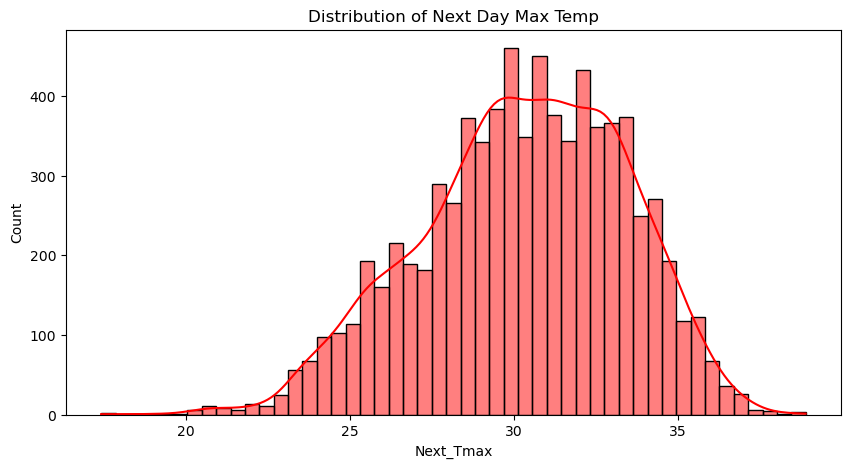

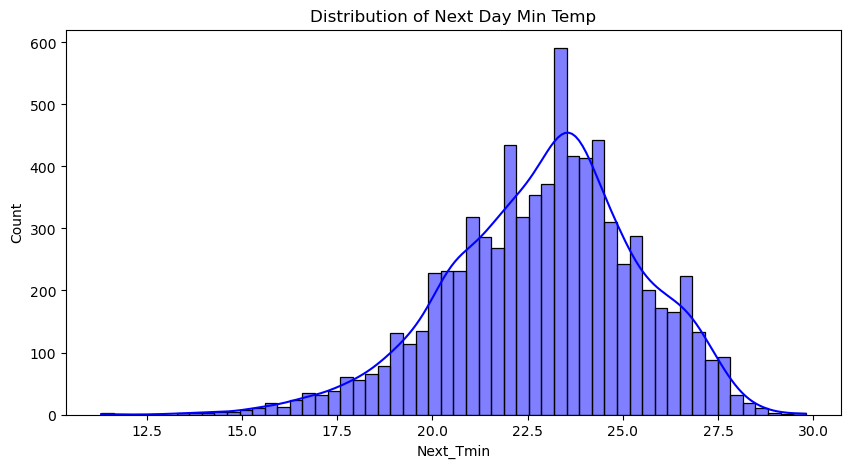

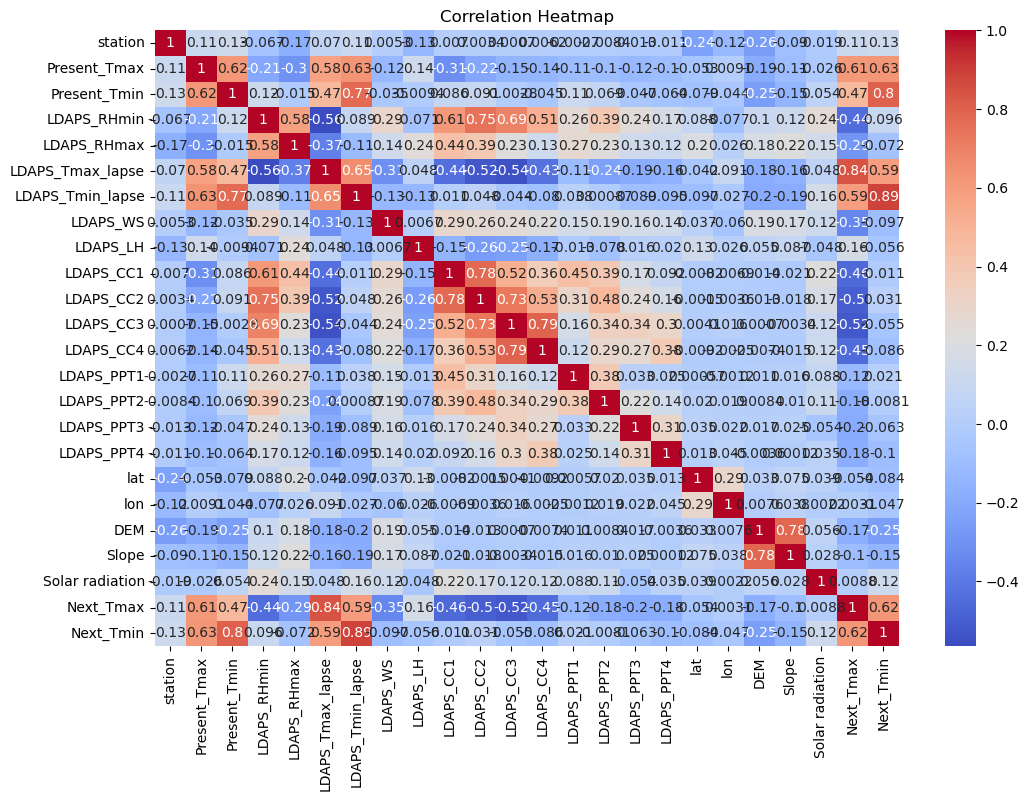

In [3]:
# Visualize distributions of target variables (MaxTemp and MinTemp)
plt.figure(figsize=(10,5))
sns.histplot(data['Next_Tmax'], kde=True, color='r')
plt.title('Distribution of Next Day Max Temp')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data['Next_Tmin'], kde=True, color='b')
plt.title('Distribution of Next Day Min Temp')
plt.show()

# Exclude non-numeric columns from the correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
# Data Preprocessing
# Filling missing values
data.fillna(method='ffill', inplace=True)

# Dropping unnecessary columns
data = data.drop(columns=['Date'])

# Ensure there are no missing values
data.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [5]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
# Define feature matrix (X) and target variables (y)
X = data.drop(columns=['Next_Tmax', 'Next_Tmin'])
y_max = data['Next_Tmax']
y_min = data['Next_Tmin']

# Split data into train/test sets for both max and min temperature prediction
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_max_scaled = scaler.fit_transform(X_train_max)
X_test_max_scaled = scaler.transform(X_test_max)

X_train_min_scaled = scaler.fit_transform(X_train_min)
X_test_min_scaled = scaler.transform(X_test_min)

In [7]:
# Model Building and Evaluation

# Linear Regression
lr_max = LinearRegression()
lr_max.fit(X_train_max_scaled, y_train_max)
y_max_pred_lr = lr_max.predict(X_test_max_scaled)

lr_min = LinearRegression()
lr_min.fit(X_train_min_scaled, y_train_min)
y_min_pred_lr = lr_min.predict(X_test_min_scaled)

# Evaluate Linear Regression
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

print("Linear Regression (Max Temp):", evaluate_model(y_test_max, y_max_pred_lr))
print("Linear Regression (Min Temp):", evaluate_model(y_test_min, y_min_pred_lr))


Linear Regression (Max Temp): (1.104845863737898, 1.4526392739144567, 0.7845060318127578)
Linear Regression (Min Temp): (0.7584430800249324, 0.968334792250102, 0.8501835740614698)


In [8]:
# Random Forest Regressor
rf_max = RandomForestRegressor(n_estimators=100, random_state=42)
rf_max.fit(X_train_max_scaled, y_train_max)
y_max_pred_rf = rf_max.predict(X_test_max_scaled)

rf_min = RandomForestRegressor(n_estimators=100, random_state=42)
rf_min.fit(X_train_min_scaled, y_train_min)
y_min_pred_rf = rf_min.predict(X_test_min_scaled)

# Evaluate Random Forest
print("Random Forest (Max Temp):", evaluate_model(y_test_max, y_max_pred_rf))
print("Random Forest (Min Temp):", evaluate_model(y_test_min, y_min_pred_rf))


Random Forest (Max Temp): (0.7225441650548029, 0.96712845880728, 0.9044814147767428)
Random Forest (Min Temp): (0.5725480335267567, 0.7607092367492089, 0.9075417351610077)


In [9]:
#XGBoost Regressor
xgb_max = XGBRegressor(random_state=42)
xgb_max.fit(X_train_max_scaled, y_train_max)
y_max_pred_xgb = xgb_max.predict(X_test_max_scaled)

xgb_min = XGBRegressor(random_state=42)
xgb_min.fit(X_train_min_scaled, y_train_min)
y_min_pred_xgb = xgb_min.predict(X_test_min_scaled)

# Evaluate XGBoost
print("XGBoost (Max Temp):", evaluate_model(y_test_max, y_max_pred_xgb))
print("XGBoost (Min Temp):", evaluate_model(y_test_min, y_min_pred_xgb))


XGBoost (Max Temp): (0.6664444963367888, 0.8762101437239845, 0.9215963812153397)
XGBoost (Min Temp): (0.500508010933124, 0.660496105181444, 0.9302974155023848)


In [10]:
# Cross Validation
cv_scores_rf_max = cross_val_score(rf_max, X_train_max_scaled, y_train_max, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation RF (Max Temp):", np.mean(np.sqrt(-cv_scores_rf_max)))

cv_scores_rf_min = cross_val_score(rf_min, X_train_min_scaled, y_train_min, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation RF (Min Temp):", np.mean(np.sqrt(-cv_scores_rf_min)))

Cross-Validation RF (Max Temp): 1.0402066910904035
Cross-Validation RF (Min Temp): 0.7903798738962877


In [11]:
# Hyperparameter Tuning on Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf_max = GridSearchCV(rf_max, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_max.fit(X_train_max_scaled, y_train_max)

grid_search_rf_min = GridSearchCV(rf_min, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_min.fit(X_train_min_scaled, y_train_min)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [12]:
# Best Params and Evaluation of the Best Model
best_rf_max = grid_search_rf_max.best_estimator_
best_rf_min = grid_search_rf_min.best_estimator_

y_max_pred_best_rf = best_rf_max.predict(X_test_max_scaled)
y_min_pred_best_rf = best_rf_min.predict(X_test_min_scaled)

print("Best Random Forest (Max Temp):", evaluate_model(y_test_max, y_max_pred_best_rf))
print("Best Random Forest (Min Temp):", evaluate_model(y_test_min, y_min_pred_best_rf))

Best Random Forest (Max Temp): (0.7140627725573149, 0.9564826374237549, 0.9065727131710856)
Best Random Forest (Min Temp): (0.5676113851220183, 0.7560270137675954, 0.9086764076325464)


In [13]:
# Save the Best Model for Production
with open('best_model_max_temp.pkl', 'wb') as file:
    pickle.dump(best_rf_max, file)

with open('best_model_min_temp.pkl', 'wb') as file:
    pickle.dump(best_rf_min, file)
